# **Numerieke Oplossing**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

### **Variabelen**

In [66]:
dT = 0.5 # K
dt = 1 # s
dx = 0.01 # m
Tm = 54 + 273.15

l_l, rho_l, c_l = (0.15, 780, 2100)
l_s, rho_s, c_s = (0.24, 860, 2900)

L = 2.1e5

T_0 = 20 + 273.15
T_x0 = Tm
T_ref = Tm - dT

i_max, j_max = (1000, 10) # i: tijd, j: x

### **Functies**

In [68]:
def theta_l(T):
    if T >= Tm + dT:
        return 1
    elif Tm - dT < T and T < Tm + dT:
        return (T - Tm + dT)/2/dT
    else:
        return 0

def theta_s(T):
    return 1 - theta_l(T)

def l_phi(T):
    return theta_l(T) * l_l + theta_s(T) * l_s

def rho_phi(T):
    return theta_l(T) * rho_l + theta_s(T) * rho_s

def dthetal_dT(T):
    if Tm - dT < T and T < Tm + dT:
        return 1/2/dT
    else:
        return 0

def cA(T):
    return theta_s(T)*rho_s*c_s + theta_l(T)*rho_l*c_l + ((rho_l*c_l - rho_s*c_s)*(T - T_ref) + rho_l*L) * dthetal_dT(T)

### **Iteratie**

i, j, T(i,j), dt/dx**2/Ca, (l_phi..)
0 2 293.15 0.00400962309542903 -6.63
0 3 293.15 0.00400962309542903 6.63
0 4 293.15 0.00400962309542903 0.0
0 5 293.15 0.00400962309542903 0.0
0 6 293.15 0.00400962309542903 0.0
0 7 293.15 0.00400962309542903 0.0
0 8 293.15 0.00400962309542903 0.0
0 9 293.15 0.00400962309542903 0.0
1 2 293.1234161988773 0.00400962309542903 -6.6351838412189235
1 3 293.17658380112266 0.00400962309542903 6.6479440657578115
1 4 293.15 0.00400962309542903 -0.019140336808331992
1 5 293.15 0.00400962309542903 0.006380112269443998
1 6 293.15 0.00400962309542903 0.0
1 7 293.15 0.00400962309542903 0.0
1 8 293.15 0.00400962309542903 0.0
1 9 293.15 0.00400962309542903 0.0
2 2 293.0968116125051 0.00400962309542903 -6.640371735561497
2 3 293.20323955118585 0.00400962309542903 6.665914440844871
2 4 293.14992325446343 0.00400962309542903 -0.038338616496753276
2 5 293.1500255818455 0.00400962309542903 0.012820469785078786
2 6 293.15 0.00400962309542903 -3.069821462759137e-05
2 7 293

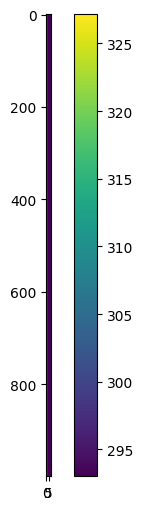

In [77]:
T_grid = np.ones((i_max, j_max))*T_0
T_grid[:,0] = T_x0
T_grid[:,1] = T_x0

print('i, j, T(i,j), dt/dx**2/Ca, (l_phi..)')

for i in range(i_max-1):
    for j in range(2, j_max):
        T_grid[i+1, j] = T_grid[i, j] + dt/dx**2/cA(T_grid[i, j])*(l_phi(T_grid[i,j-1])*(T_grid[i,j]-T_grid[i,j-1]) - l_phi(T_grid[i,j-2])*(T_grid[i,j-1]-T_grid[i,j-2]))
        print(i,j,T_grid[i,j],dt/dx**2/cA(T_grid[i, j]), (l_phi(T_grid[i,j-1])*(T_grid[i,j]-T_grid[i,j-1]) - l_phi(T_grid[i,j-2])*(T_grid[i,j-1]-T_grid[i,j-2])))
    
    if i > 3:
        break

plt.figure(figsize=(6,6))
plt.imshow(T_grid)
plt.colorbar()
plt.show()